## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### Hypothesis 1: Wet or damp road conditions are associated with higher accident frequencies.

#### 1. Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Define path
path = r'C:\Users\muham\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 6\05-10-25 Accident_data_germany_2024_analysis'

In [6]:
# Import Data
df_gemeinde_level = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_gemeinde_level.csv'), low_memory= False)

In [27]:
df_gemeinde_level.head()

,state,administrative_region,administrative_district,municipality,accident_count,MuncipalityName,MuncipalityArea,MuncipalityPopulation,Fatal,Minor,...,Dry,Slippery (winter),Wet/damp/slippery,m_accident_per_100k,Fatal_rate,darkness_rate,daylight_rate,twilight_rate,Dry_rate,Wet/damp/slippery_rate
0,1,0,1,0,349,"Flensburg, Stadt",56.73,96326.0,2,325,...,216,7,126,362.311318,0.005731,0.223496,0.699140,0.077364,0.618911,0.361032
1,1,0,2,0,1027,"Kiel, Landeshauptstadt",118.65,252668.0,4,930,...,692,22,313,406.462235,0.003895,0.204479,0.732230,0.063291,0.673807,0.304771
2,1,0,3,0,1118,"Lübeck, Hansestadt",214.19,216889.0,1,1008,...,799,20,299,515.471047,0.000894,0.169052,0.770125,0.060823,0.714669,0.267442
3,1,0,4,0,362,"Neumünster, Stadt",71.66,79809.0,0,329,...,245,3,114,453.582929,0.000000,0.182320,0.732044,0.085635,0.676796,0.314917
4,1,0,51,1,10,Albersdorf,17.12,3742.0,0,9,...,6,1,3,267.236772,0.000000,0.100000,0.900000,0.000000,0.600000,0.300000


### Data Cleaning

In [31]:
# Check for missing values

df_gemeinde_level.isnull().sum()

# No missing values to handle

state                      0
administrative_region      0
administrative_district    0
municipality               0
accident_count             0
MuncipalityName            1
MuncipalityArea            1
MuncipalityPopulation      1
Fatal                      0
Minor                      0
Severe                     0
darkness                   0
daylight                   0
twilight                   0
Dry                        0
Slippery (winter)          0
Wet/damp/slippery          0
m_accident_per_100k        0
Fatal_rate                 0
darkness_rate              0
daylight_rate              0
twilight_rate              0
Dry_rate                   0
Wet/damp/slippery_rate     0
dtype: int64

In [39]:
pd.set_option('display.max_columns', None)
rows_with_null = df_gemeinde_level[df_gemeinde_level.isnull().any(axis=1)]
print(rows_with_null)

      state  administrative_region  administrative_district  municipality  \
3639      7                      2                       32            96   

      accident_count MuncipalityName  MuncipalityArea  MuncipalityPopulation  \
3639               1             NaN              NaN                    NaN   

      Fatal  Minor  Severe  darkness  daylight  twilight  Dry  \
3639      0      1       0         0         1         0    1   

      Slippery (winter)  Wet/damp/slippery  m_accident_per_100k  Fatal_rate  \
3639                  0                  0                  0.0         0.0   

      darkness_rate  daylight_rate  twilight_rate  Dry_rate  \
3639            0.0            1.0            0.0       1.0   

      Wet/damp/slippery_rate  
3639                     0.0  


In [40]:
# Dropping the one row with NaN values, it has only 1 total accident, so dropping it wont imapct our analysis. Want to have NaN free data for regression model.
df_gemeinde_level = df_gemeinde_level.dropna()


In [41]:
df_gemeinde_level.isnull().sum()


state                      0
administrative_region      0
administrative_district    0
municipality               0
accident_count             0
MuncipalityName            0
MuncipalityArea            0
MuncipalityPopulation      0
Fatal                      0
Minor                      0
Severe                     0
darkness                   0
daylight                   0
twilight                   0
Dry                        0
Slippery (winter)          0
Wet/damp/slippery          0
m_accident_per_100k        0
Fatal_rate                 0
darkness_rate              0
daylight_rate              0
twilight_rate              0
Dry_rate                   0
Wet/damp/slippery_rate     0
dtype: int64

C:\Users\Ali\AppData\Local\Temp\ipykernel_24592\4291536804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gemeinde_level['m_accident_per_100k'], bins=5) # Shows extreme values


<Axes: xlabel='m_accident_per_100k', ylabel='Density'>

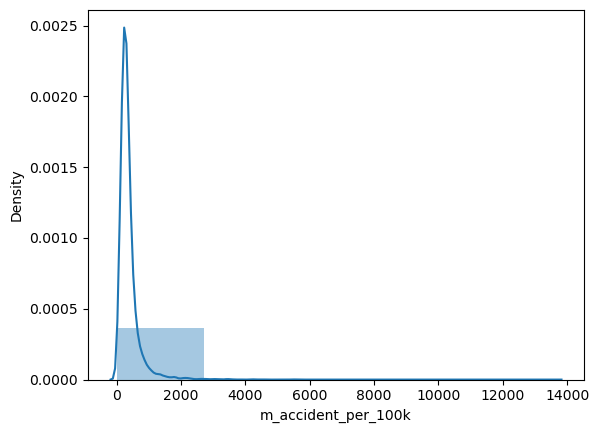

In [30]:
sns.distplot(df_gemeinde_level['m_accident_per_100k'], bins=5) # Shows extreme values


In [43]:
df_gemeinde_level['m_accident_per_100k'].mean() # Check the mean

np.float64(376.82495978966523)

In [44]:
df_gemeinde_level['m_accident_per_100k'].median() # Check the median

294.4062806673209

In [45]:
df_gemeinde_level['m_accident_per_100k'].max() # Check the max

13636.363636363636

In [46]:
df_gemeinde_level.describe()

,state,administrative_region,administrative_district,municipality,accident_count,MuncipalityArea,MuncipalityPopulation,Fatal,Minor,Severe,darkness,daylight,twilight,Dry,Slippery (winter),Wet/damp/slippery,m_accident_per_100k,Fatal_rate,darkness_rate,daylight_rate,twilight_rate,Dry_rate,Wet/damp/slippery_rate
count,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9.507000e+03,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000
mean,7.853792,2.369412,52.905543,103.033449,28.244241,35.965493,8.736843e+03,0.258546,23.595246,4.390449,5.444935,21.263911,1.535395,21.035553,0.497633,6.711055,376.824960,0.017558,0.191092,0.755914,0.052994,0.734552,0.232922
std,4.028235,2.227835,21.346473,111.404095,125.003303,41.444842,3.503763e+04,0.733791,110.564553,14.497316,26.236278,92.254241,6.879343,94.463372,1.437406,29.959035,390.646219,0.077011,0.213066,0.230863,0.116496,0.242656,0.230568
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.300000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,34.000000,24.000000,3.000000,10.315000,9.460000e+02,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,206.481249,0.000000,0.000000,0.666667,0.000000,0.650000,0.000000
50%,8.000000,2.000000,57.000000,73.000000,7.000000,22.530000,2.475000e+03,0.000000,5.000000,2.000000,1.000000,5.000000,0.000000,5.000000,0.000000,2.000000,294.406281,0.000000,0.166667,0.777778,0.000000,0.758065,0.200000
75%,9.000000,4.000000,73.000000,138.000000,20.000000,45.515000,6.838000e+03,0.000000,16.000000,4.000000,4.000000,16.000000,1.000000,15.000000,1.000000,5.000000,421.052632,0.000000,0.250000,1.000000,0.066667,0.916667,0.333333
max,16.000000,9.000000,91.000000,718.000000,5044.000000,636.270000,1.505005e+06,17.000000,4600.000000,582.000000,1064.000000,3739.000000,247.000000,3943.000000,48.000000,1140.000000,13636.363636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
pd.set_option('display.max_columns', None)
filtered_df = df_gemeinde_level[df_gemeinde_level['m_accident_per_100k'] >= 1000]

print(filtered_df)

      state  administrative_region  administrative_district  municipality  \
8         1                      0                       51            10   
25        1                      0                       51            33   
28        1                      0                       51            36   
37        1                      0                       51            52   
40        1                      0                       51            58   
...     ...                    ...                      ...           ...   
9465     16                      0                       76            42   
9472     16                      0                       76            68   
9474     16                      0                       76            74   
9490     16                      0                       77            17   
9505     16                      0                       77            47   

      accident_count     MuncipalityName  MuncipalityArea  \
8             

### 3. Data prep for regression analysis 

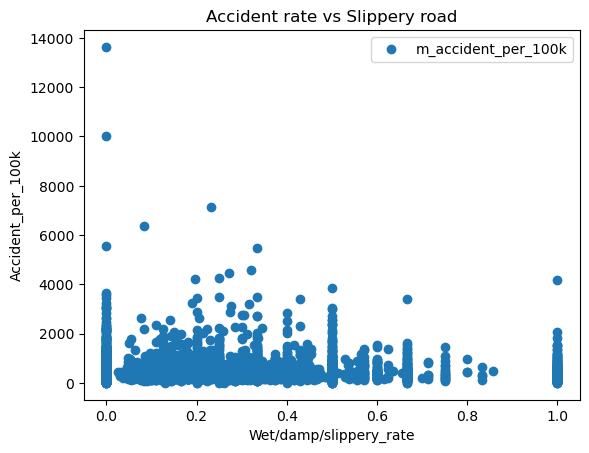

In [75]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_gemeinde_level.plot(x = 'Wet/damp/slippery_rate', y='m_accident_per_100k',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Accident rate vs Slippery road')  
plt.xlabel('Wet/damp/slippery_rate')  
plt.ylabel('Accident_per_100k')  
plt.show()

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_gemeinde_level['Wet/damp/slippery_rate'].values.reshape(-1,1)
y = df_gemeinde_level['m_accident_per_100k'].values.reshape(-1,1)

In [26]:
X

array([[0.36103152],
       [0.30477118],
       [0.26744186],
       ...,
       [0.16666667],
       [0.5       ],
       [0.42857143]], shape=(9508, 1))

In [27]:
y

array([[ 362.31131782],
       [ 406.46223503],
       [ 515.4710474 ],
       ...,
       [1183.43195266],
       [ 179.53321364],
       [ 384.40417353]], shape=(9508, 1))

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression analysis

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

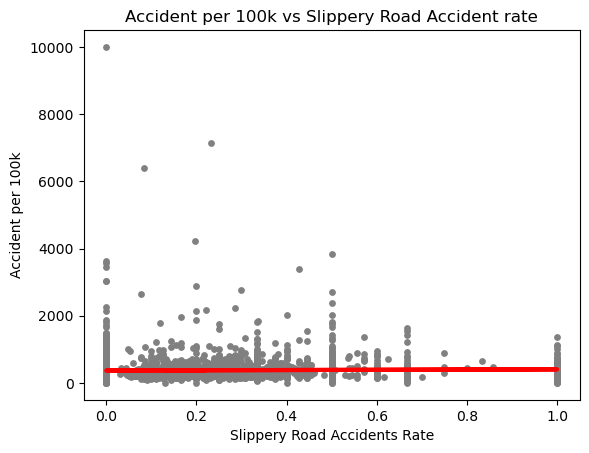

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Accident per 100k vs Slippery Road Accident rate')
plot_test.xlabel('Slippery Road Accidents Rate')
plot_test.ylabel('Accident per 100k')
plot_test.show()

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[35.06206649]]
Mean squared error:  165905.76989304987
R2 score:  0.0004235065681663652


##### Slope = 35.06 which means for every 1-unit increase in slippery road accident rate, the predicted accident rate per 100k increases by ≈ 35. This is a very small slope, suggesting a weak relationship.
##### Mean squared error = 165,905, the average squared difference between predicted and actual accident rates — quite high, showing large prediction errors, which is also visible in the actual vs predicted values table.
##### R2 score = 0.00042 The model explains 0.042 % of the variance — essentially no explanatory power. The model does not fit the data well.

In [35]:
y_predicted

array([[377.00252358],
       [369.38033521],
       [381.06769071],
       ...,
       [381.06769071],
       [373.27612038],
       [374.05527741]], shape=(2853, 1))

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,270.079850,377.002524
1,1481.481481,369.380335
2,280.461203,381.067691
3,278.801155,378.145852
4,271.857329,374.990266
5,262.467192,374.389202
6,195.465207,376.392749
7,372.093023,369.380335
8,356.506239,369.380335
9,526.315789,369.380335


##### Compare how the regression fits the training set

In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[35.06206649]]
Mean squared error:  146780.08573826228
R2 score:  0.00044663301405289957


##### The R2 value on the training set is the same as test set i.e. 0.0004, which means we have not overfitted our model.

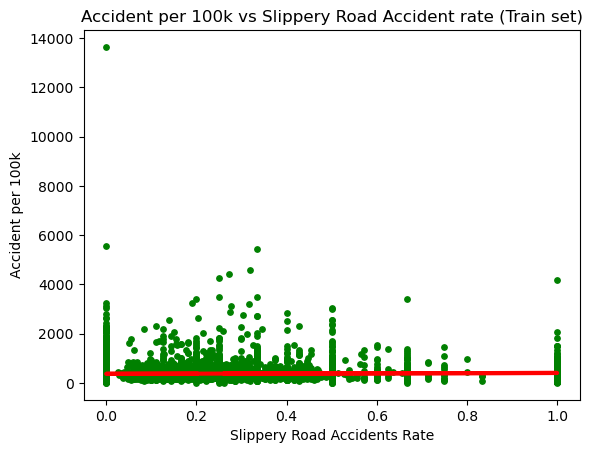

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Accident per 100k vs Slippery Road Accident rate (Train set)')
plot_test.xlabel('Slippery Road Accidents Rate')
plot_test.ylabel('Accident per 100k')
plot_test.show()

### RESULTS:
##### Slope: While positive (consistent with the hypothesis directionally), it’s very small compared to the variance in the dependent variable (accidents per 100k population) — meaning that slippery roads are not a strong predictor of accident frequency at the municipality level.

##### R squared near zero: The model’s line is almost flat and doesn’t capture the spread of the points. This suggests little to no linear relationship between the two variables.

##### High error: The large MSE compared to the scale of the dependent variable implies that the model’s predictions are widely off from the true values.

#### The direction of the slope supports the hypothesis, but the evidence is not statistically or practically significant. Looking at the above mantioned results In hypothesis, we fail to reject the null hypothesis i.e., we have no strong evidence that wet/damp conditions are linearly associated with accident frequency at the municipality level.

### Hypothesis 2: There is no significant linear relationship between twilight accident rate and accident rate per 100k population.

#### Data prep for regression analysis

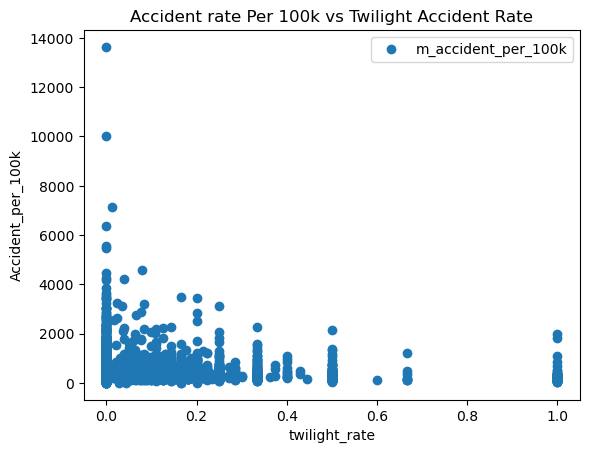

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_gemeinde_level.plot(x = 'twilight_rate', y='m_accident_per_100k',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Accident rate Per 100k vs Twilight Accident Rate')  
plt.xlabel('twilight_rate')  
plt.ylabel('Accident_per_100k')  
plt.show()

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df_gemeinde_level['twilight_rate'].values.reshape(-1,1)
y_2 = df_gemeinde_level['m_accident_per_100k'].values.reshape(-1,1)

In [43]:
X_2

array([[0.0773639 ],
       [0.06329114],
       [0.0608229 ],
       ...,
       [0.16666667],
       [0.        ],
       [0.28571429]], shape=(9508, 1))

In [44]:
y_2

array([[ 362.31131782],
       [ 406.46223503],
       [ 515.4710474 ],
       ...,
       [1183.43195266],
       [ 179.53321364],
       [ 384.40417353]], shape=(9508, 1))

In [45]:
# Split data into a training set and a test set.

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

#### Regression analysis

In [46]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [47]:
# Fit the regression object onto the training set.

regression.fit(X_2_train, y_2_train)

LinearRegression()

In [48]:
# Predict the values of y using X.

y_2_predicted = regression.predict(X_2_test)

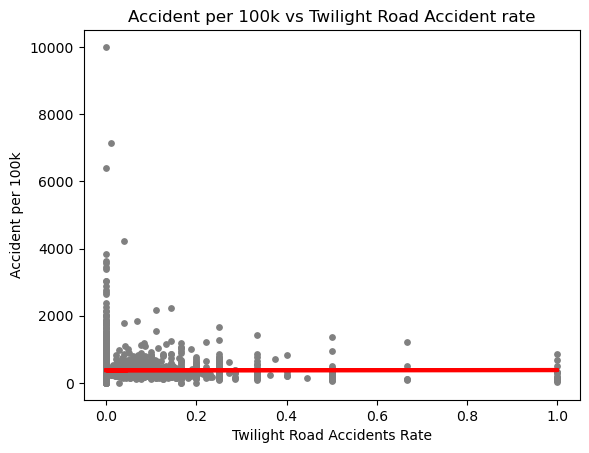

In [49]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_2_test, y_2_test, color='gray', s = 15)
plot_test.plot(X_2_test, y_2_predicted, color='red', linewidth =3)
plot_test.title('Accident per 100k vs Twilight Road Accident rate')
plot_test.xlabel('Twilight Road Accidents Rate')
plot_test.ylabel('Accident per 100k')
plot_test.show()

In [50]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_2_test, y_2_predicted) # This is the mean squared error
r2 = r2_score(y_2_test, y_2_predicted) # This is the R2 score. 

In [51]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.23757316]]
Mean squared error:  166008.31710696928
R2 score:  -0.0001943368291237313


#### Slope = 6.2376	For every 1-unit increase in twilight accident rate, the accident rate per 100k population increases by ~6.24 (on average).
#### Mean Squared Error = 166,008.31, The average squared difference between predicted and actual accident rates is quite high, showing large prediction errors, which is also visible in the actual vs predicted values table.¶.
#### R2 Score =	-0.00019, the model explains almost none of the variation in the dependent variable. The negative R2 means the model performs slightly worse than simply using the mean as a predictor.

In [52]:
y_2_predicted

array([[377.48009535],
       [377.20889652],
       [378.59502389],
       ...,
       [377.20889652],
       [377.9019602 ],
       [377.20889652]], shape=(2853, 1))

In [53]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_2_test.flatten(), 'Predicted': y_2_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,270.079850,377.480095
1,1481.481481,377.208897
2,280.461203,378.595024
3,278.801155,377.505924
4,271.857329,377.208897
5,262.467192,378.099978
6,195.465207,377.208897
7,372.093023,377.208897
8,356.506239,377.208897
9,526.315789,377.208897


#### Compare how the regression fits the training set

In [55]:
# Predict.

y_2_predicted_train = regression.predict(X_2_train) # This is predicting X_train!

In [56]:
rmse = mean_squared_error(y_2_train, y_2_predicted_train)
r2 = r2_score(y_2_train, y_2_predicted_train)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.23757316]]
Mean squared error:  146845.15872396406
R2 score:  3.49441230806935e-06


#### The R2 value on the training set is the same as test set i.e. ~ 0, which means we have not overfitted our model.

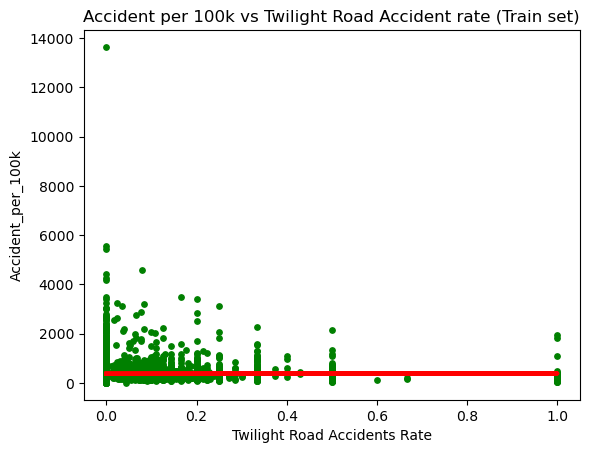

In [58]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_2_train, y_2_train, color='green', s = 15)
plot_test.plot(X_2_train, y_2_predicted_train, color='red', linewidth =3)
plot_test.title('Accident per 100k vs Twilight Road Accident rate (Train set)')
plot_test.xlabel('Twilight Road Accidents Rate')
plot_test.ylabel('Accident_per_100k')
plot_test.show()

### RESULTS:
#### The positive slope (6.24) suggests that as twilight accident rate increases, accident rate per 100k tends to increase slightly. However, the R² value (-0.00019) shows that this linear model explains virtually none of the variability in accident rates — it’s not a meaningful predictor in a linear sense.
#### The MSE (166,008) is large relative to the expected scale, suggesting the model’s predictions are not accurate.
#### This means that although there’s a moderate correlation (r = 0.5) visually or numerically, the linear regression model does not generalize well.
### Thus, we fail to reject the null hypothesis and conclude that there is no significant linear relationship between twilight accident rate and accident rate per 100k population based on this model.

#### The results of this analysis indicate that the slippery/wet and twilight accident rate has a minimal explanatory effect on the total accident rate per 100,000 population, as reflected by a very low R² value. This suggests that the simple linear regression model may not adequately capture the complexity of factors influencing accident rates. Important explanatory variables such as traffic volume, weather conditions, population density, and driver behavior were not included in the model, which may have limited its predictive power and led to underfitting.
#### In addition, there is potential for measurement bias in the dataset. The definitions and scales used to classify variables such as road condition (wet/damp) and light condition (twilight) are not clearly specified. This lack of standardization could result in inconsistent reporting across different states or reporting officers. For example, the classification of “twilight” might vary depending on local lighting conditions or the time of day an accident was reported. Such inconsistencies could lead to misclassification errors, introducing bias that affects the reliability of the observed relationships and the accuracy of the regression results.